In [4]:
import pandas as pd

In [5]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
# (2) выведите, что за типы переменных, сколько пропусков,
df.info()

# для численных значений посчитайте пару статистик (в свободной форме)
df['AGE'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [18]:
print(df['AGE'].max())
print(df['AGE'].min())

79
21


In [100]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

femaleDf = df[(df['SEX'] == 2) & (df['EDUCATION'] == 2)]
len(femaleDf)

8656

In [127]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
billCols = pd.DataFrame(femaleDf.columns, columns = ['name'])
billCols = billCols[billCols['name'].str.contains('^BILL_.*', regex=True)]
femaleDf.groupby('default.payment.next.month')[list(billCols['name'])].median()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
default.payment.next.month,,,,,,
0,27170.5,26629.0,25131.0,22444.5,20212.0,19572.0
1,25946.5,25706.0,23833.5,21719.5,20090.5,19626.5


In [188]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
df.pivot_table('SEX', 'EDUCATION', 'MARRIAGE')
# Как понимаю, если значение 1.5 - значит женщин и мужчин с уровнем образования и семейным положением поровну
# Если больше 1.5, то женщин больше
# Например с уровнем образования 6 и семейным положением 3 только женщины

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,1.500000,1.400000,NaN
1,1.750000,1.545943,1.613306,1.400000
2,1.833333,1.653610,1.581197,1.611111
3,1.727273,1.633695,1.531692,1.650485
4,NaN,1.653846,1.661765,1.666667
5,NaN,1.680000,1.637795,1.666667
6,NaN,1.500000,1.476190,2.000000


In [197]:
pd.pivot_table(df[['ID', 'SEX', 'EDUCATION', 'MARRIAGE']], values='ID', index=['SEX', 'MARRIAGE'], columns=['EDUCATION'], aggfunc='count')

EDUCATION       0       1       2       3     4      5     6
SEX MARRIAGE                                                
1   0         NaN     1.0     1.0    12.0   NaN    NaN   NaN
    1         2.0  1690.0  2370.0  1048.0  18.0   48.0  14.0
    2         6.0  2633.0  2940.0   894.0  23.0   46.0  11.0
    3         NaN    30.0    63.0    36.0   1.0    1.0   NaN
2   0         NaN     3.0     5.0    32.0   NaN    NaN   NaN
    1         2.0  2032.0  4472.0  1813.0  34.0  102.0  14.0
    2         4.0  4176.0  4080.0  1015.0  45.0   81.0  10.0
    3         NaN    20.0    99.0    67.0   2.0    2.0   2.0

In [147]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

def limitBalCategory(value):
    return {
        value <= 10000: 'A',
        10000 < value <= 100000: 'B',
        100000 < value <= 200000: 'C',
        200000 < value <= 400000: 'D',
        400000 < value <= 700000: 'E',
        700000 < value: 'F'
    }[True]
df['LIMIT_CAT'] = df['LIMIT_BAL'].map(limitBalCategory)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LIMIT_CAT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [148]:
%matplotlib inline

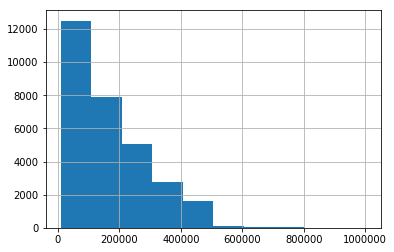

In [149]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

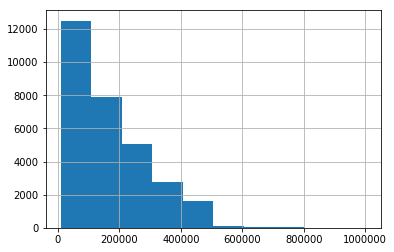

In [150]:
df['LIMIT_BAL'].hist()

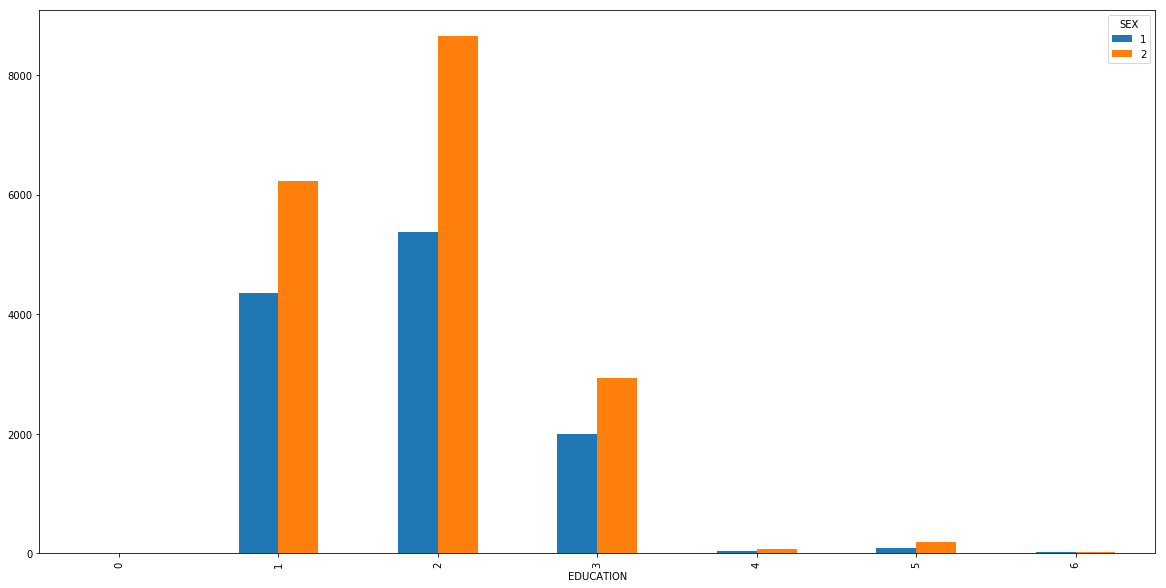

In [171]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
# Количество записей с кредитным лимитом от образования для каждого пола
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'count').plot(kind='bar', ax=ax)

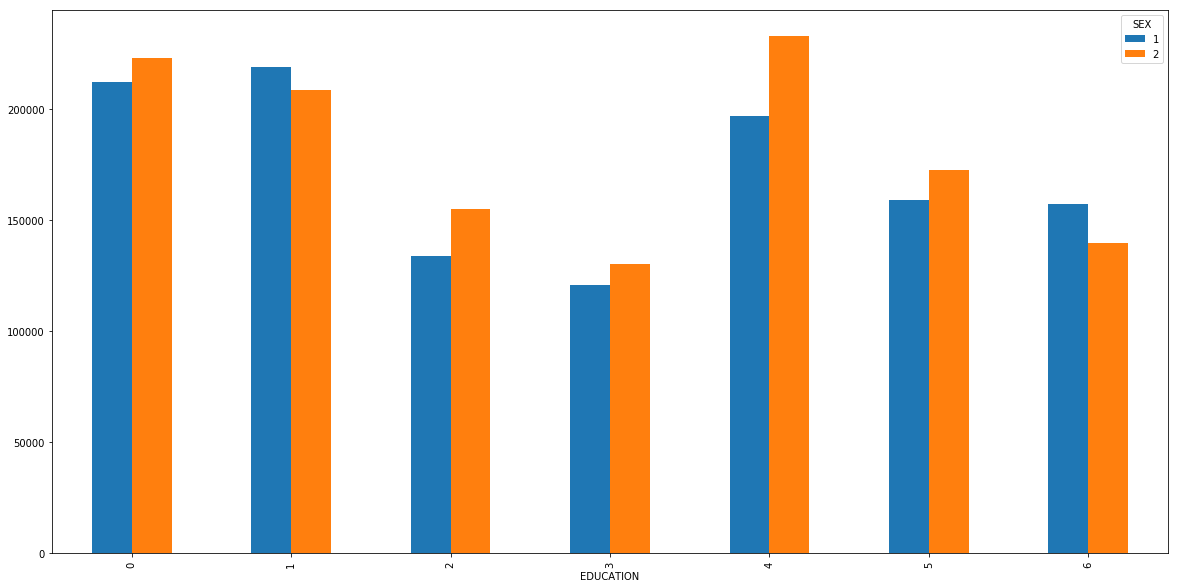

In [175]:
fig, ax = plt.subplots(figsize=(20,10))
# Среднее значение кредитного лимита в зависимости от образования для каждого пола
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax)

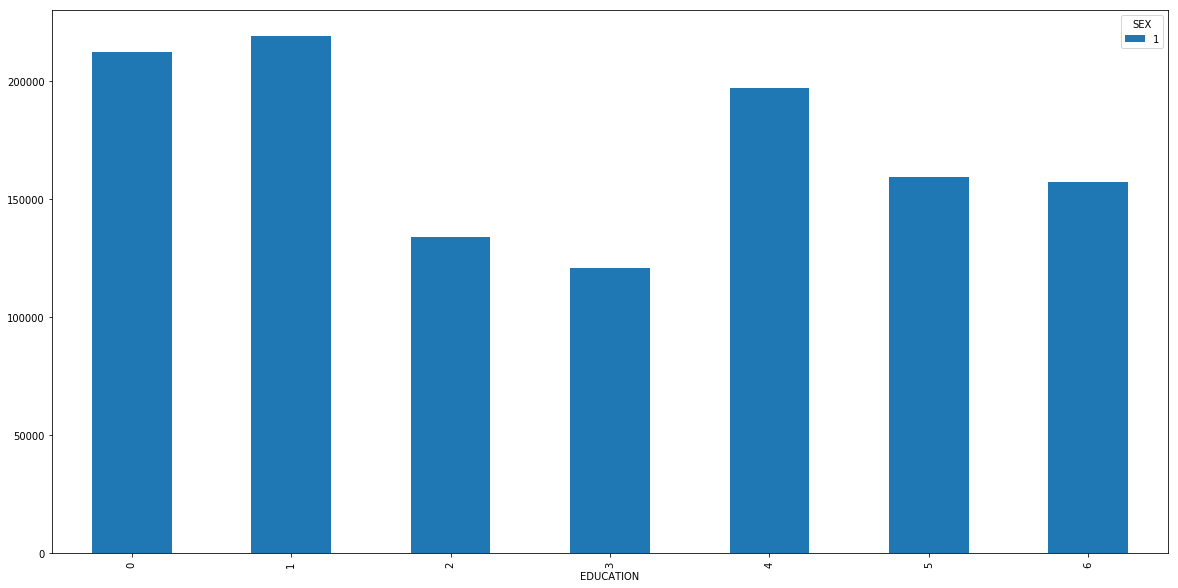

In [156]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax)

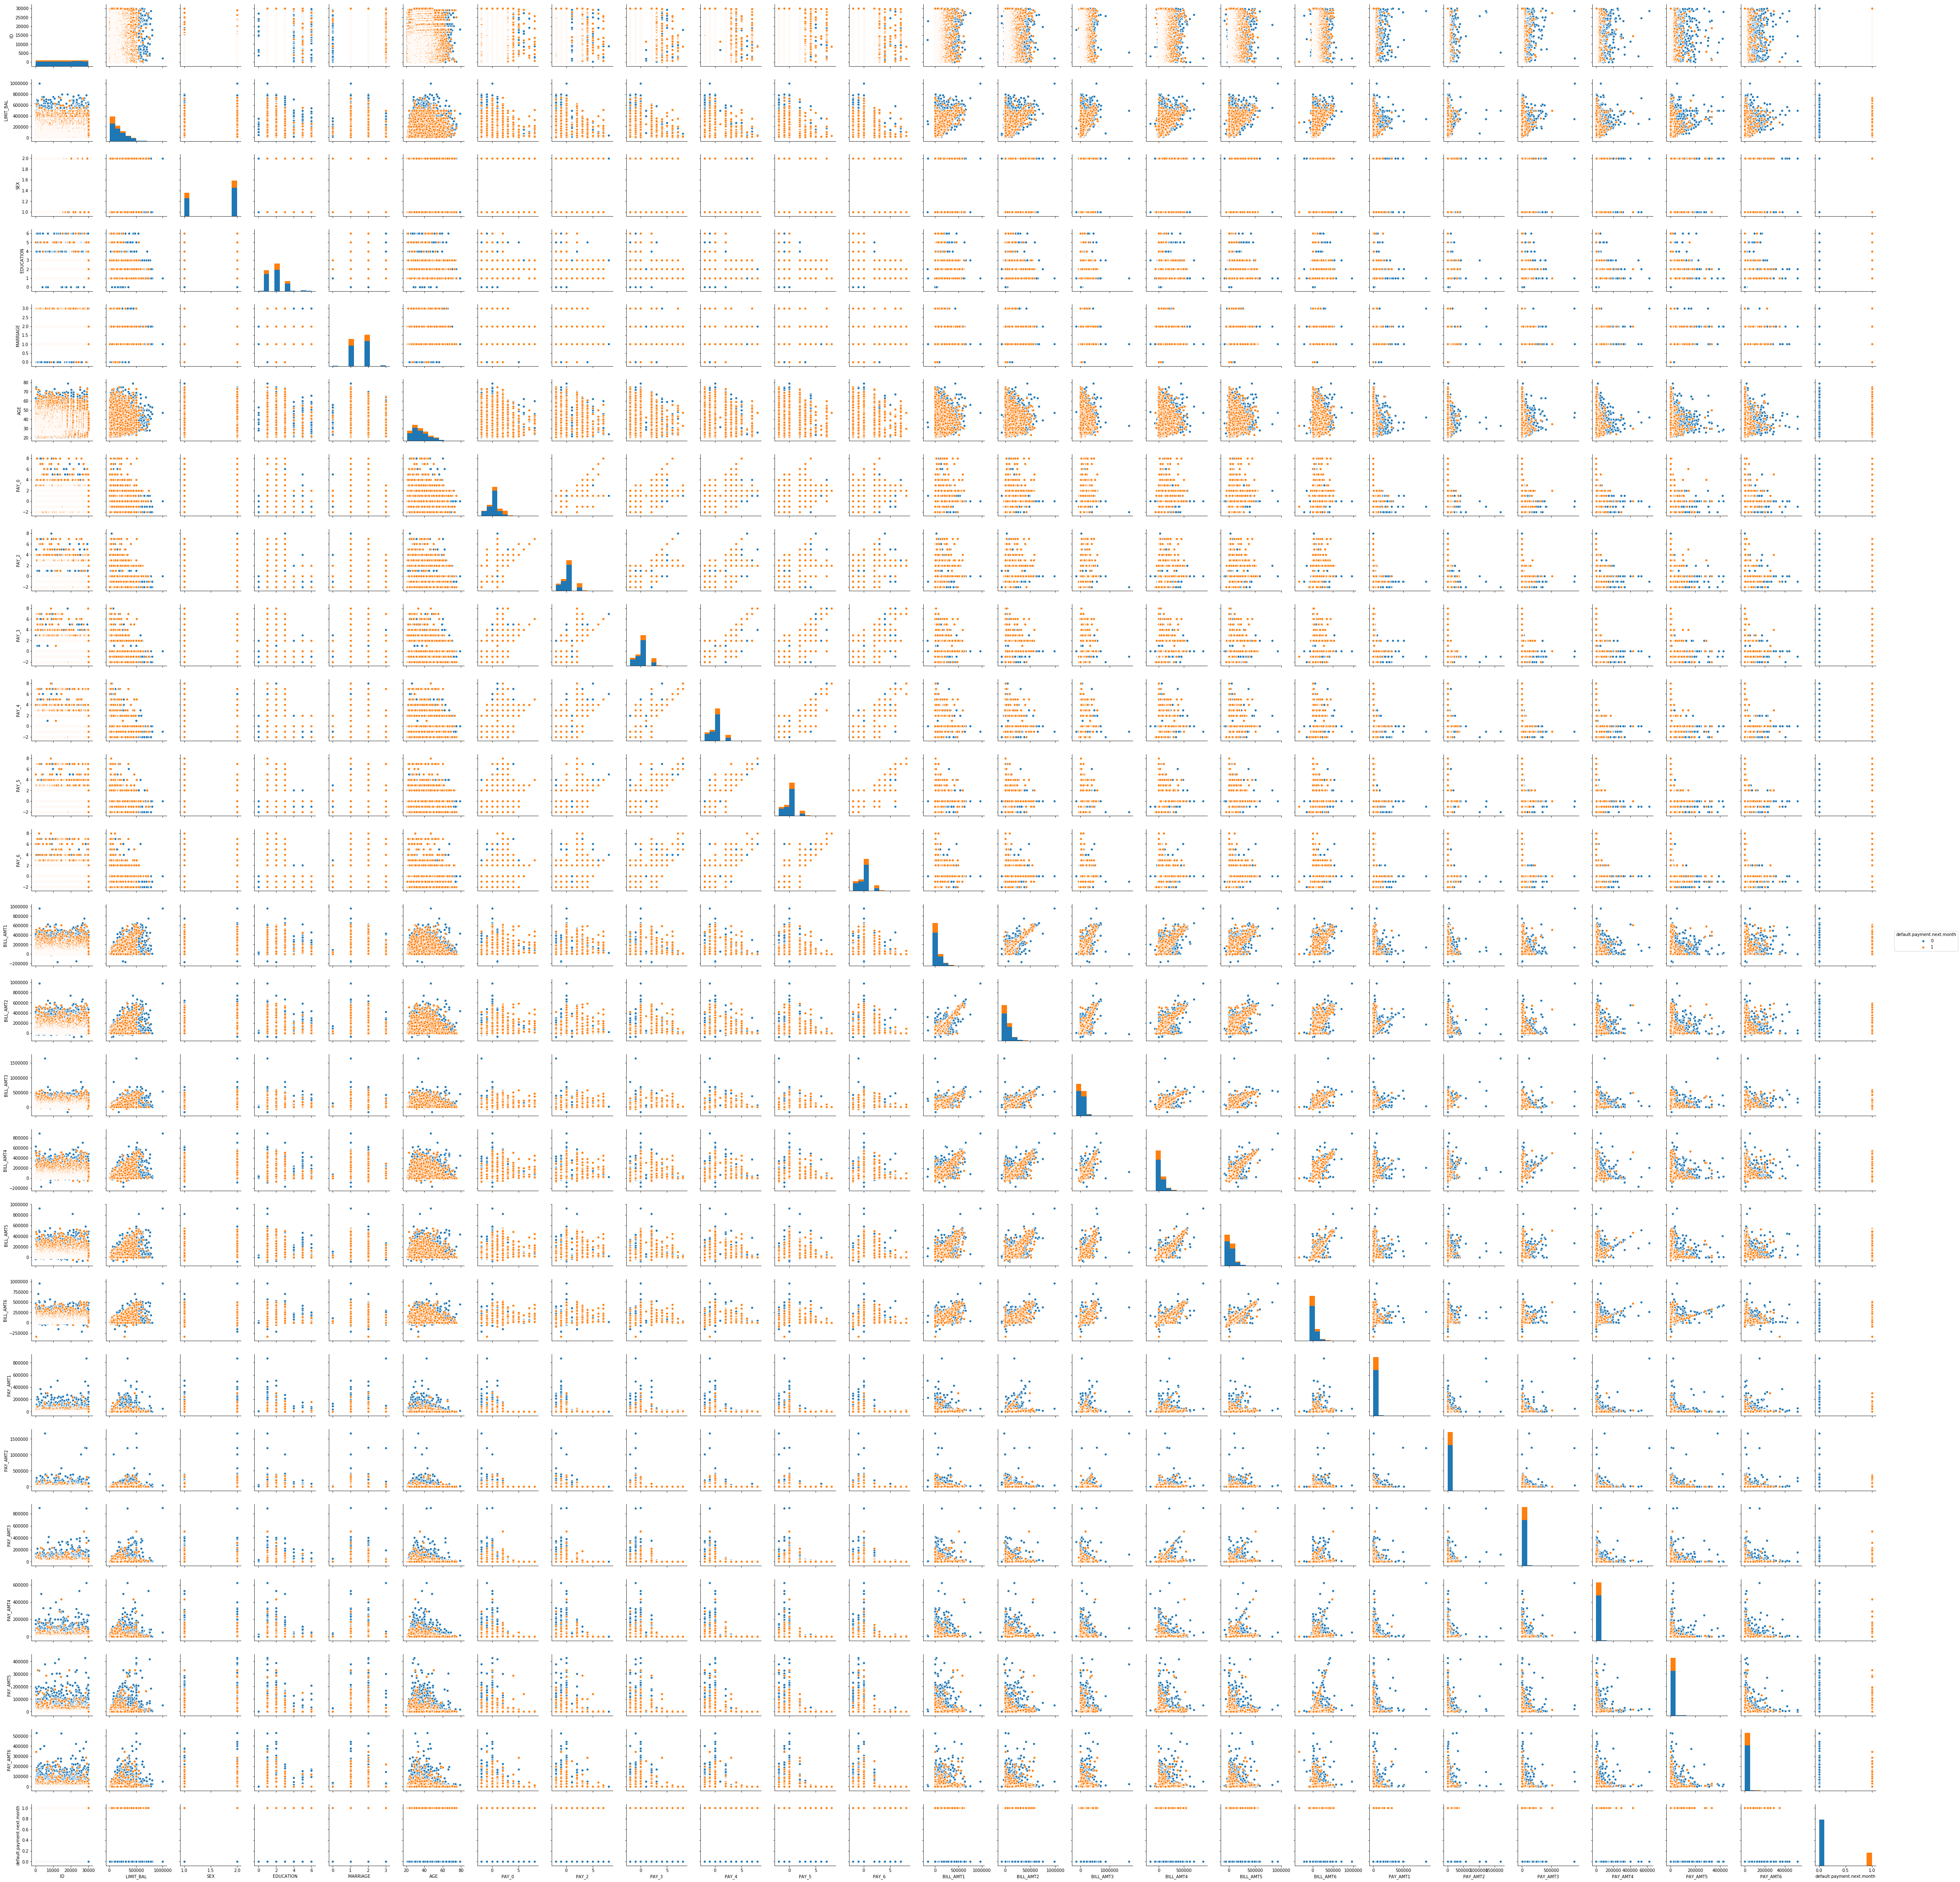

In [158]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

sns.pairplot(df, hue='default.payment.next.month')